# NASA Space Apps: Seismic Activity Analyzer

## Demo Notebook: Plot Apollo 12 Grade A Catalog

### Import Libraries and CSV File

In [98]:
# Import libraries
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
from obspy.core import read

In [99]:
cat_directory = './data/training/catalogs/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)
cat

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19T20:25:00.000000,73500.0,evid00002,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25T03:32:00.000000,12720.0,evid00003,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26T20:17:00.000000,73020.0,evid00004,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25T01:14:00.000000,4440.0,evid00006,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26T14:29:00.000000,52140.0,evid00007,deep_mq
...,...,...,...,...,...
71,xa.s12.00.mhz.1974-10-14HR00_evid00156,1974-10-14T17:43:00.000000,63780.0,evid00156,impact_mq
72,xa.s12.00.mhz.1975-04-12HR00_evid00191,1975-04-12T18:15:00.000000,65700.0,evid00191,impact_mq
73,xa.s12.00.mhz.1975-05-04HR00_evid00192,1975-05-04T10:05:00.000000,36300.0,evid00192,impact_mq
74,xa.s12.00.mhz.1975-06-24HR00_evid00196,1975-06-24T16:03:00.000000,57780.0,evid00196,impact_mq


### Select A Detection (Manually)
Let’s pick the first seismic event in the catalog and let’s take a look at the absolute time data. The way we show it here is by using pandas .iloc and datetime .strptime. We are going to keep the format shown in the absolute time header, which is '%Y-%m-%dT%H:%M:%S.%f'

In [100]:
row = cat.iloc[6] # Location of the first "deep_mq", or deep moon quake
arrival_time = datetime.strptime(row['time_abs(%Y-%m-%dT%H:%M:%S.%f)'],'%Y-%m-%dT%H:%M:%S.%f')
arrival_time

datetime.datetime(1970, 6, 26, 20, 1)

In [101]:
# If we want the value of relative time, we don't need to use datetime
arrival_time_rel = row['time_rel(sec)']
arrival_time_rel

72060.0

In [102]:
# Let's also get the name of the file
test_filename = row.filename
test_filename

'xa.s12.00.mhz.1970-06-26HR00_evid00009'

### Read and plot the .csv corresponding to that detection
We will now find the csv data file corresponding to that time and plot it.

In [103]:
data_directory = './data/training/data/S12_GradeA/'
csv_file = f'{data_directory}{test_filename}.csv'
data_cat = pd.read_csv(csv_file)
data_cat


C:\Users\asmig\AppData\Local\Temp\ipykernel_30192\3115188807.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_cat = pd.read_csv(csv_file)


,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s),1.24099E-13
0,1970-06-26T00:00:00.116000,0.000000,-6.730000e-16,1.240990e-13
1,1970-06-26T00:00:00.266943,0.150943,-8.650000e-16,1.240990e-13
2,1970-06-26T00:00:00.417887,0.301887,-9.300000e-16,1.240990e-13
3,1970-06-26T00:00:00.568830,0.452830,-8.590000e-16,1.240990e-13
4,1970-06-26T00:00:00.719774,0.603774,-7.140000e-16,1.240990e-13
...,...,...,...,...
1048570,NaN,NaN,NaN,1.240990e-13
1048571,NaN,NaN,NaN,1.240990e-13
1048572,NaN,NaN,NaN,1.240990e-13
1048573,NaN,NaN,NaN,1.240990e-13


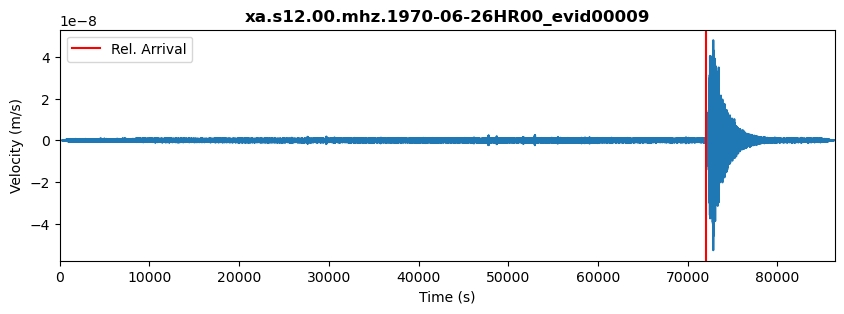

In [104]:
# Read in time steps and velocities
csv_times = np.array(data_cat['time_rel(sec)'].tolist())
csv_data = np.array(data_cat['velocity(m/s)'].tolist())

# Plot the trace!
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(csv_times,csv_data)

# Make the plot pretty
ax.set_xlim([min(csv_times),max(csv_times)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
ax.set_title(f'{test_filename}', fontweight='bold')

# Plot where the arrival time is
arrival_line = ax.axvline(x=arrival_time_rel, c='red', label='Rel. Arrival')
ax.legend(handles=[arrival_line])

### Alternate Method: Use Miniseed File Corresponding to that Detection

In [105]:
mseed_file = f'{data_directory}{test_filename}.mseed'
# xa.s12.00.mhz.1970-06-26HR00_evid00009.mseed
mseed_file2 = "/data/xa.s12.00.mhz.1975-04-12HR00_evid00191.mseed"
st = read(mseed_file)
st

1 Trace(s) in Stream:
XA.S12.00.MHZ | 1970-06-26T00:00:00.116000Z - 1970-06-27T00:00:03.436755Z | 6.6 Hz, 572423 samples

### Filter the Trace
It’s useful to filter the trace to bring out particular frequencies. This will change the shape of the data and make it easier to see certain parts of the signal. In this example, we will filter the data using a bandpass filter between 0.01 Hz to 0.5 Hz

In [106]:
# Set the minimum frequency
minfreq = 0.5
maxfreq = 1.0

# Going to create a separate trace for the filter data
st_filt = st.copy()
st_filt.filter('bandpass',freqmin=minfreq,freqmax=maxfreq)
tr_filt = st_filt.traces[0].copy()
tr_times_filt = tr_filt.times()
tr_data_filt = tr_filt.data

In [107]:
# To better see the patterns, we will create a spectrogram using the scipy function
# It requires the sampling rate, which we can get from the miniseed header as shown a few cells above
from scipy import signal
from matplotlib import cm
f, t, sxx = signal.spectrogram(tr_data_filt, tr_filt.stats.sampling_rate)

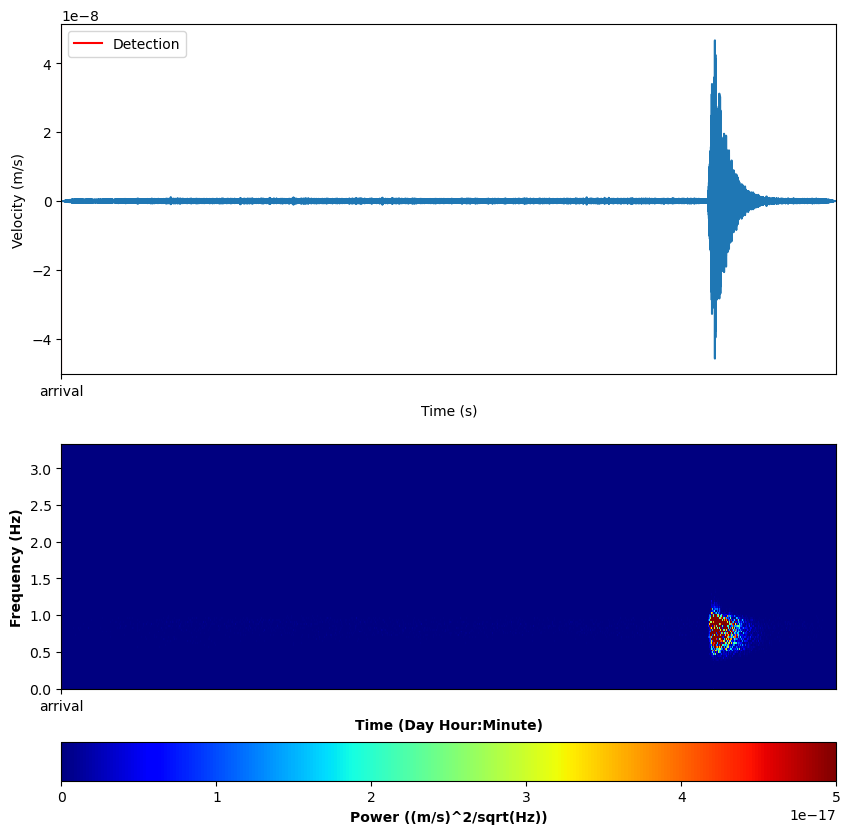

In [108]:
# Plot the time series and spectrogram
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(2, 1, 1)

# Plot trace
ax.plot(tr_times_filt,tr_data_filt)

# Mark detection
ax.axvline(x = 'arrival', color='red',label='Detection')
ax.legend(loc='upper left')

# Make the plot pretty
ax.set_xlim([min(tr_times_filt),max(tr_times_filt)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
ax2 = plt.subplot(2, 1, 2)
vals = ax2.pcolormesh(t, f, sxx, cmap=cm.jet, vmax=5e-17)
ax2.set_xlim([min(tr_times_filt),max(tr_times_filt)])
ax2.set_xlabel(f'Time (Day Hour:Minute)', fontweight='bold')
ax2.set_ylabel('Frequency (Hz)', fontweight='bold')
ax2.axvline(x='arrival', c='red')
cbar = plt.colorbar(vals, orientation='horizontal')
cbar.set_label('Power ((m/s)^2/sqrt(Hz))', fontweight='bold')

### Sample short-term average / long-term average (STA/LTA) detection algorithm
A STA/LTA algorithm moves two time windows of two lengths (one short, one long) across the
seismic data. The algorithm calculates the average amplitude in both windows, and calculates the ratio between them. If the data contains an earthquake, then the short-term window containing the earthquake will be much larger than the long-term window – resulting in a detection.


Text(0, 0.5, 'Characteristic function')

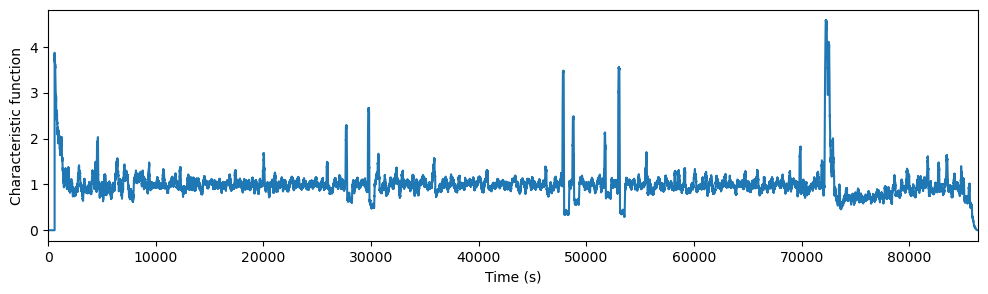

In [109]:
from obspy.signal.invsim import cosine_taper
from obspy.signal.filter import highpass
from obspy.signal.trigger import classic_sta_lta, plot_trigger, trigger_onset

tr = st.traces[0].copy()
tr_times = tr.times()
tr_data = tr.data

# Sampling frequency of our trace
df = tr.stats.sampling_rate
# How long should the short-term and long-term window be, in seconds?
sta_len = 120
lta_len = 600
# Run Obspy's STA/LTA to obtain a characteristic function
# This function basically calculates the ratio of amplitude between the short-term
# and long-term windows, moving consecutively in time across the data
cft = classic_sta_lta(tr_data, int(sta_len * df), int(lta_len * df))
# Plot characteristic function
fig,ax = plt.subplots(1,1,figsize=(12,3))
ax.plot(tr_times,cft)
ax.set_xlim([min(tr_times),max(tr_times)])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Characteristic function')

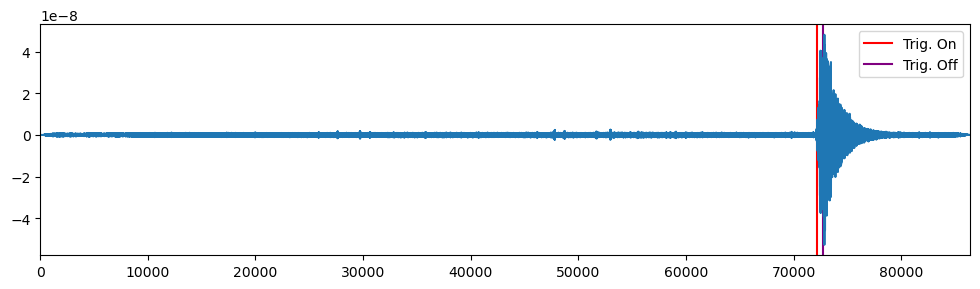

In [110]:
# Play around with the on and off triggers, based on values in the characteristic function
thr_on = 4
thr_off = 1.5
on_off = np.array(trigger_onset(cft, thr_on, thr_off))
# The first column contains the indices where the trigger is turned "on".
# The second column contains the indices where the trigger is turned "off".
# Plot on and off triggers
fig,ax = plt.subplots(1,1,figsize=(12,3))
for i in np.arange(0,len(on_off)):
    triggers = on_off[i]
    ax.axvline(x = tr_times[triggers[0]], color='red', label='Trig. On')
    ax.axvline(x = tr_times[triggers[1]], color='purple', label='Trig. Off')
# Plot seismogram
ax.plot(tr_times,tr_data)
ax.set_xlim([min(tr_times),max(tr_times)])
ax.legend()

### Sample Detection Export Into a Catalog (using Pandas library)

In [111]:
# File name and start time of trace
fname = row.filename
starttime = tr.stats.starttime.datetime
# Iterate through detection times and compile them
detection_times = []
fnames = []
for i in np.arange(0,len(on_off)):
    triggers = on_off[i]
    on_time = starttime + timedelta(seconds = tr_times[triggers[0]])
    on_time_str = datetime.strftime(on_time,'%Y-%m-%dT%H:%M:%S.%f')
    detection_times.append(on_time_str)
    fnames.append(fname)
# Compile dataframe of detections
detect_df = pd.DataFrame(data = {'filename':fnames, 'time_abs(%Y-%m-%dT%H:%M:%S.%f)':detection_times, 'time_rel(sec)':tr_times[triggers[0]]})
detect_df.head()
detect_df.to_csv('output/catalog.csv', index=False)

### Use a Rule-based System/Approach to Perform Anomaly Detection
Here, we will use quantile detection from ADTK, or the Anomaly Detection Tool Kit (a python package).

In [112]:
from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import *

In [113]:
'''data_directorytest = './data/training/data/S12_GradeA/'
test_filename = 'xa.s12.00test'
csv_file = f'{data_directorytest}{test_filename}.csv'
data_cat_test = pd.read_csv(csv_file)
data_cat_test = data_cat_test.set_index("time_rel(sec)")
data_cat_test = data_cat_test["Mean"]
quantile_detector = QuantileAD(low = 0.01, high = 0.99)
anomalies = quantile_detector.fit_detect(data_cat_test)
plot(data_cat_test, anomaly=anomalies, anomaly_color="red",anomaly_tag="marker")'''






'data_directorytest = \'./data/training/data/S12_GradeA/\'\ntest_filename = \'xa.s12.00test\'\ncsv_file = f\'{data_directorytest}{test_filename}.csv\'\ndata_cat_test = pd.read_csv(csv_file)\ndata_cat_test = data_cat_test.set_index("time_rel(sec)")\ndata_cat_test = data_cat_test["Mean"]\nquantile_detector = QuantileAD(low = 0.01, high = 0.99)\nanomalies = quantile_detector.fit_detect(data_cat_test)\nplot(data_cat_test, anomaly=anomalies, anomaly_color="red",anomaly_tag="marker")'